# Задание 3

In [2]:
%matplotlib inline

import random
import math
from itertools import islice
from typing import Generator, Tuple, List

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


sns.set(style='whitegrid')

In [3]:
def uniform_generator_2d(a: float, b: float) -> Generator[Tuple[float, float], None, None]:
    while True:
        yield (
            a * (2 * random.random() - 1),
            b * (2 * random.random() - 1)
        )

In [4]:
def uniform_generator_3d(a: float, b: float, c: float) -> Generator[Tuple[float, float, float], None, None]:
    while True:
        yield (
            a * (2 * random.random() - 1),
            b * (2 * random.random() - 1),
            c * (2 * random.random() - 1)
        )


In [5]:
def inside_ellipse(a: float, b: float, point: Tuple[float, float]):
    return (point[0] ** 2 / a ** 2) + (point[1] ** 2 / b ** 2) < 1

In [6]:
def inside_ellipsoid( a: float, b: float, c: float, point: Tuple[float, float, float]):
    return (point[0] ** 2 / a ** 2) + (point[1] ** 2 / b ** 2 + (point[2] ** 2 / c ** 2)) < 1

## Упражнение 1.
Составить программу моделирования случайных точек, равномерно распределенных  внутри эллипса $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$.

Построить гистограмму распределения.

In [7]:
def ellipse_generator(a: float, b: float)-> Generator[Tuple[float, float], None, None]:
    gen = uniform_generator_2d(a, b)
    while True:
        point = next(gen)
        if inside_ellipse(a, b, point):
            yield point

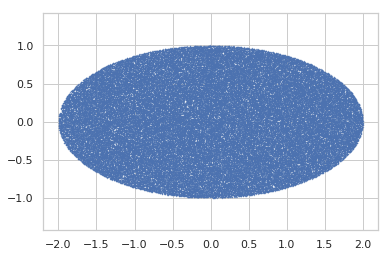

In [8]:
n_points = 10 ** 5

points = list(islice(ellipse_generator(2, 1), n_points))

plt.scatter(x=[p[0] for p in points], y=[p[1] for p in points], s=0.1)

plt.axis('equal')
plt.show()

## Упражнение 2.
Составить программы для вычисления площади эллипса и объема трехосного эллипсоида $\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1$.

Привести результаты вычислений при нескольких значениях $N$.

Сравнить результаты с точным значением при нескольких значениях $N$.

### Площадь эллипса

In [9]:
a = 3
b = 4

gen = uniform_generator_2d(a, b)

exact_area = math.pi * a * b
underlying_area = 4 * a * b

for n in (10 ** 3, 10 ** 4, 10 ** 6):
    points = islice(gen, n)
    points_inside = 0
    for p in points:
        if inside_ellipse(a, b, p):
            points_inside += 1
    area = underlying_area * points_inside / n
    print(f'area_diff={math.fabs(exact_area-area)/exact_area}')

area_diff=0.023425269188130114
area_diff=0.0007616052918442644


area_diff=0.0004178306147657801


### Объём эллипсоида

In [10]:
a = 3
b = 4
c = 5

gen = uniform_generator_3d(a, b, c)

exact_volume = 4 * math.pi * a * b * c / 3
underlying_volume = 8 * a * b * c

for n in (10 ** 3, 10 ** 4, 10 ** 6):
    points = islice(gen, n)
    points_inside = 0
    for p in points:
        if inside_ellipsoid(a, b, c, p):
            points_inside += 1
    volume = underlying_volume * points_inside / n
    print(f'rel_area_diff={math.fabs(exact_volume-volume)/exact_volume}')

rel_area_diff=0.010692873740778496
rel_area_diff=0.0057319163863051616


rel_area_diff=0.00013602858719415732


## Упражнение 3.

Составить программу для моделирования случайных чисел с плотностью.

Построить гистограммы распределений, сравнить их с аналитической формулой.

In [11]:
n_points = 10 ** 4

$w(x) = \frac{c}{x^{c+1}}, (1 < x < \infty)$

$x = (1 - \gamma)^{-\frac{1}{c}}$

(array([9.991e+03, 6.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.00004243,  34.12579894,  67.25155546, 100.37731197,
        133.50306849, 166.628825  , 199.75458152, 232.88033803,
        266.00609455, 299.13185106, 332.25760758]),
 <a list of 10 Patch objects>)

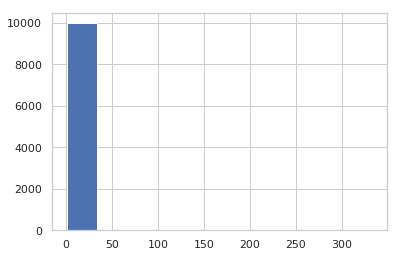

In [18]:
def gen(c: float = 2) -> Generator[float, None, None]:
    while True:
        yield (1 - random.random()) ** (- 1 / c)


points = list(islice(gen(), n_points))
plt.hist(points)

$w(x) = \frac{1}{\sqrt{8 (1 - x)}}, (-1 < x < 1)$

$x = 1 - 2 (1 - \gamma)^2 $

(array([ 511.,  528.,  551.,  633.,  646.,  772.,  860., 1018., 1296.,
        3185.]),
 array([-9.99732539e-01, -7.99759285e-01, -5.99786031e-01, -3.99812777e-01,
        -1.99839523e-01,  1.33730431e-04,  2.00106984e-01,  4.00080238e-01,
         6.00053492e-01,  8.00026746e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

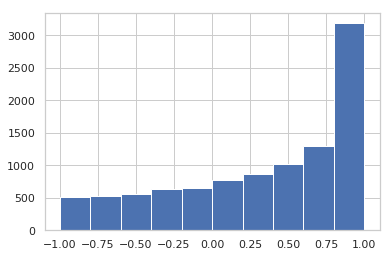

In [20]:
def gen() -> Generator[float, None, None]:
    while True:
        yield 1 - 2 * (1 - random.random()) ** 2


points = list(islice(gen(), n_points))
plt.hist(points)

$w(x) = \frac{3}{4} (1 - x^2), (-1 < x < 1)$

$x = \dfrac{1 + (1 - 2\gamma + 2\sqrt{-\gamma + \gamma^2})^{2/3}}{(1 - 2\gamma + 2\sqrt{-\gamma + \gamma^2})^{1/3}}$

In [24]:
def gen() -> Generator[float, None, None]:
    while True:
        gamma = random.random()
        yield (1 + (1 - 2 * gamma + 2 * math.sqrt(-gamma + gamma ** 2))) ** (2/3) / \
              (1 - 2 * gamma + 2 * math.sqrt(-gamma + gamma ** 2)) ** (1 / 3)


points = list(islice(gen(), n_points))
plt.hist(points)

ValueError: math domain error

$w(r) = \frac{2 r}{R^2}, (0 < r < R)$

$r = R \sqrt{\gamma}$

(array([ 115.,  305.,  510.,  784.,  872., 1085., 1346., 1471., 1620.,
        1892.]),
 array([0.00813653, 0.10731959, 0.20650265, 0.30568571, 0.40486877,
        0.50405183, 0.60323488, 0.70241794, 0.801601  , 0.90078406,
        0.99996712]),
 <a list of 10 Patch objects>)

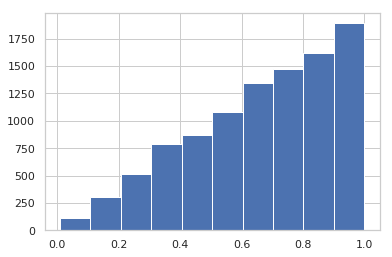

In [25]:
def gen(R: float = 1) -> Generator[float, None, None]:
    while True:
        gamma = random.random()
        yield R * math.sqrt(gamma)


points = list(islice(gen(), n_points))
plt.hist(points)

$w(r) = \frac{2 r^2}{R^3}, (0 < r < R)$

$r = R \sqrt[3]{\gamma}$

(array([  22.,   83.,  230.,  398.,  651.,  899., 1242., 1661., 2160.,
        2654.]),
 array([0.02816241, 0.1253437 , 0.22252498, 0.31970627, 0.41688755,
        0.51406883, 0.61125012, 0.7084314 , 0.80561269, 0.90279397,
        0.99997525]),
 <a list of 10 Patch objects>)

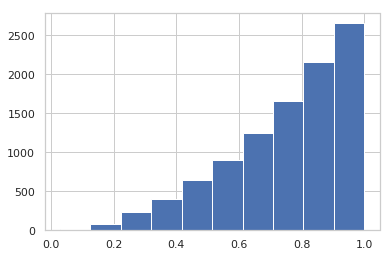

In [26]:
def gen(R: float = 1) -> Generator[float, None, None]:
    while True:
        gamma = random.random()
        yield R * gamma ** (1 / 3)


points = list(islice(gen(), n_points))
plt.hist(points)

$w(r) = \frac{r}{\sigma^2} \exp{- \frac{r^2}{2 \sigma^2}}$

$r = \sigma \sqrt{-2 \ln{(1 - \gamma)}}$

(array([ 878., 2153., 2474., 2007., 1345.,  681.,  313.,  111.,   27.,
          11.]),
 array([0.01015722, 0.42252563, 0.83489404, 1.24726246, 1.65963087,
        2.07199928, 2.48436769, 2.89673611, 3.30910452, 3.72147293,
        4.13384135]),
 <a list of 10 Patch objects>)

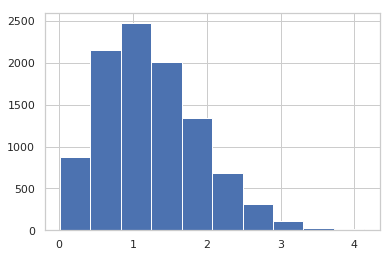

In [27]:
def gen(sigma: float = 1) -> Generator[float, None, None]:
    while True:
        gamma = random.random()
        yield sigma * math.sqrt(-2 * math.log(1 - gamma))


points = list(islice(gen(), n_points))
plt.hist(points)

$w(\theta) = \frac{1}{2} \sin{\theta}$

$\theta = 1 - \arccos{(1 - 2 \gamma)}$

(array([ 267.,  764., 1115., 1352., 1553., 1509., 1322., 1102.,  746.,
         270.]),
 array([-2.12935135, -1.81669531, -1.50403926, -1.19138322, -0.87872718,
        -0.56607114, -0.2534151 ,  0.05924094,  0.37189698,  0.68455303,
         0.99720907]),
 <a list of 10 Patch objects>)

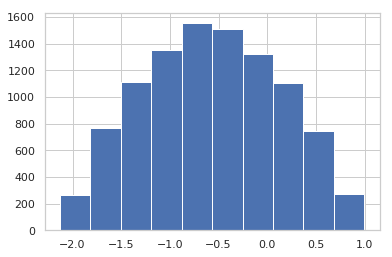

In [29]:
def gen(sigma: float = 1) -> Generator[float, None, None]:
    while True:
        gamma = random.random()
        yield 1 - math.acos(1 - 2 * gamma)


points = list(islice(gen(), n_points))
plt.hist(points)